#TEXT MINING AND SEARCH 
EXPLORATION 

In [ ]:
import pandas as pd                  
import numpy as np                  
import string                        
import re                            
from matplotlib import pyplot as plt 
from matplotlib import cm
from imblearn.over_sampling import SMOTE
from collections import OrderedDict
import seaborn as sns                
from pprint import pprint            
from collections import Counter     
from wordcloud import WordCloud      
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
        
import nltk
from nltk.corpus import stopwords            
from nltk.stem import PorterStemmer          
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer      

from sklearn.feature_extraction.text import CountVectorizer      
from sklearn.feature_extraction.text import TfidfVectorizer      
from sklearn.decomposition import TruncatedSVD                             
from sklearn.model_selection import train_test_split             
from sklearn.metrics import classification_report                 
from sklearn.ensemble import RandomForestClassifier              
from sklearn.cluster import KMeans                               
from sklearn.metrics import confusion_matrix                     
from sklearn.metrics.cluster import normalized_mutual_info_score 
from sklearn.cluster import DBSCAN                               
from sklearn.cluster import AgglomerativeClustering              
from sklearn.neighbors import KNeighborsClassifier               
from scipy.sparse import random as sparse_random
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC  
from sklearn.metrics.cluster import v_measure_score

import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics.cluster import v_measure_score

For the first part of the project we develop an explanotary phase where we describe the dataset, we chech the rpesence of Nan values, we delete the duplicates (choices by the text and UserID) and select only the most important features. 
One of the major is that the dataset is unbalance, so we create 5 samples for each type of score (one star, two stras etc.) with 30000 reviews.  

In [ ]:
amazon = pd.read_csv('/content/drive/MyDrive/text/Reviews.csv')
amazon.head()

Id  ...                                               Text
0   1  ...  I have bought several of the Vitality canned d...
1   2  ...  Product arrived labeled as Jumbo Salted Peanut...
2   3  ...  This is a confection that has been around a fe...
3   4  ...  If you are looking for the secret ingredient i...
4   5  ...  Great taffy at a great price.  There was a wid...

[5 rows x 10 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
amazon_datasetoriginale = amazon 

In [ ]:
print("numbers of record: " + str(len(amazon)))
amazon.info()

numbers of record: 568454
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
#CHECK NA VALUES 
amazon.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
amazon.describe()
#summary

Id  HelpfulnessNumerator  ...          Score          Time
count  568454.000000         568454.000000  ...  568454.000000  5.684540e+05
mean   284227.500000              1.743817  ...       4.183199  1.296257e+09
std    164098.679298              7.636513  ...       1.310436  4.804331e+07
min         1.000000              0.000000  ...       1.000000  9.393408e+08
25%    142114.250000              0.000000  ...       4.000000  1.271290e+09
50%    284227.500000              0.000000  ...       5.000000  1.311120e+09
75%    426340.750000              2.000000  ...       5.000000  1.332720e+09
max    568454.000000            866.000000  ...       5.000000  1.351210e+09

[8 rows x 5 columns]

In [ ]:
#DROP DUPLICATES  
amazon = amazon.drop_duplicates(subset = {"UserId", "ProfileName","Time","Text"})

In [ ]:
#FEATURE SELECTION 
# prendo in considerazione solo quello che mi serve
amazon = amazon.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator', 'HelpfulnessDenominator','Time','Summary'], axis = 1)

In [ ]:
print("numero di record: " + str(len(amazon)))

numero di record: 393933


Text(0, 0.5, 'Frequenza')

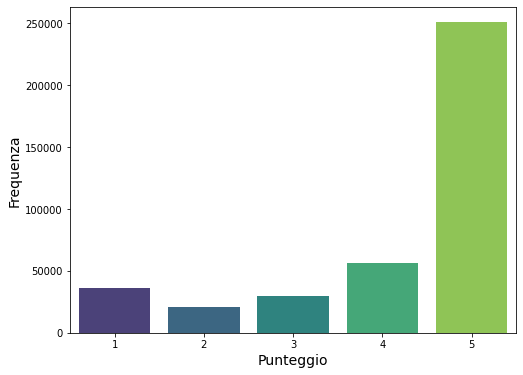

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(amazon["Score"],palette="viridis")
plt.xlabel("Punteggio", size = 14)
plt.ylabel("Frequenza", size = 14)
#THE DATASET IS UNBALANCED, IT IS MANDATORY TO BALANCED THE SCORES TO APPLY A SUPERVISIONATED APPROACH 

In [ ]:
print(amazon['Score'].loc[amazon['Score'] == 1 ].sum())
print(amazon['Score'].loc[amazon['Score'] == 2 ].sum())
print(amazon['Score'].loc[amazon['Score'] == 3 ].sum())
print(amazon['Score'].loc[amazon['Score'] == 4 ].sum())
print(amazon['Score'].loc[amazon['Score'] == 5 ].sum())

36306
41604
89307
224376
1254810


In [ ]:
#BALANCING
#we have selected 30000 rows with a single score value and we concatenate the five varaibles to obtain an unique dataframe
fraud1_df = amazon.loc[amazon['Score'] == 1].sample(n=30000,random_state=42, replace = True)
fraud2_df = amazon.loc[amazon['Score'] == 2].sample(n=30000,random_state=42, replace = True)
fraud3_df = amazon.loc[amazon['Score'] == 3].sample(n=30000,random_state=42, replace = True)
fraud4_df = amazon.loc[amazon['Score'] == 4].sample(n=30000,random_state=42, replace = True)
fraud5_df = amazon.loc[amazon['Score'] == 5].sample(n=30000,random_state=42, replace = True)

In [ ]:
amazon = pd.concat([fraud1_df,fraud2_df,fraud3_df,fraud4_df,fraud5_df])

Text(0, 0.5, 'Frequenza')

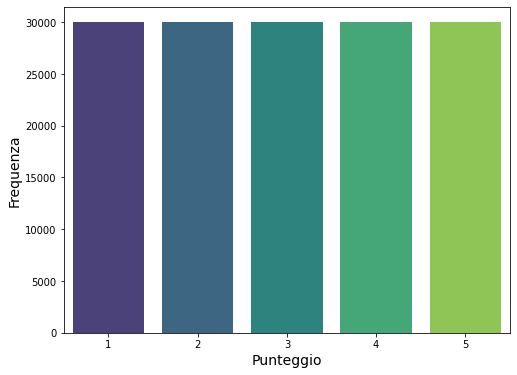

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(amazon["Score"],palette="viridis")
plt.xlabel("Punteggio", size = 14)
plt.ylabel("Frequenza", size = 14)
#THE DATASET RESULTS MORE BALANCED

Text(0, 0.5, 'Frequenza')

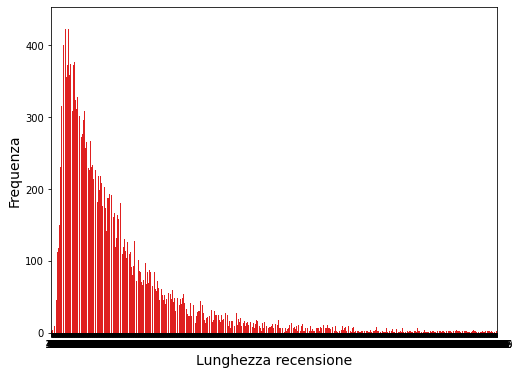

In [ ]:
amazon['len_text'] = amazon['Text'].str.len()
plt.figure(figsize = (8, 6))
sns.countplot(amazon["len_text"],color="red")
plt.xlabel("Lunghezza recensione", size = 14)
plt.ylabel("Frequenza", size = 14)

In [ ]:
amazon = amazon.drop(['len_text'], axis=1)

#TEXT PREPROCESSING 
In this phase of the project we apply the following functions:
- remove white space 
- lower case 
- remove stop words 
- remove punctuation 
- remove URLS
- Tokenization 
- Stemming 

In [ ]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
amazon["Text_stemming"] = amazon["Text"].str.lower() #LOWER CASE

amazon['Text_stemming'] = amazon['Text_stemming'].str.strip() #REMOVE WHITE SPACE

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
    
amazon["Text_stemming"] = amazon["Text_stemming"].apply(lambda text: remove_urls(text)) #REMOVE URLS 

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

amazon["Text_stemming"] = amazon["Text_stemming"].apply(lambda text: remove_punctuation(text)) #REMOVE PUNCTUATION

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

amazon["Text_stemming"] = amazon["Text_stemming"].apply(lambda text: remove_stopwords(text)) #REMOVE STOPWORDS

stemmer = PorterStemmer()
def stem_words(text):
  return " ".join([stemmer.stem(word) for word in text.split()])

amazon["Text_stemming"] = amazon["Text_stemming"].apply(lambda text: stem_words(text)) #STAMMING

amazon['Text_stemming'] = amazon.apply(lambda row: nltk.word_tokenize(row['Text_stemming']), axis=1) #TOKENIZATION 

print(".")
print("OPERAZIONE COMPLETATA")
print(".")

.
OPERAZIONE COMPLETATA
.


In [ ]:
#Vado ad osservare solamente le prime tre row, solamente per vedere come si presenta attualmente il testo:
amazon.head(3)

Score  ...                                      Text_stemming
212969      1  ...  [note, review, specif, cat, food, sold, amazon...
9648        1  ...  [well, bought, food, trip, parti, wife, spread...
142253      1  ...  [buyer, bewar, read, complet, get, much, confu...

[3 rows x 3 columns]

In [ ]:
amazon["Text_lemmatization"] = amazon["Text"].str.lower() #LOWER CASE

amazon['Text_lemmatization'] = amazon['Text_lemmatization'].str.strip() #REMOVE WHITE SPACE

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
    
amazon["Text_lemmatization"] = amazon["Text_lemmatization"].apply(lambda text: remove_urls(text)) #REMOVE URLS 

PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
    
amazon["Text_lemmatization"] = amazon["Text_lemmatization"].apply(lambda text: remove_punctuation(text)) #REMOVE PUNCTUATION

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

amazon["Text_lemmatization"] = amazon["Text_lemmatization"].apply(lambda text: remove_stopwords(text)) #REMOVE STOPWORDS

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer=WordNetLemmatizer()
nltk.download('wordnet')
from textblob import Word

amazon['Text_lemmatization'] = amazon['Text_lemmatization'].apply(lambda x: "".join([Word(word).lemmatize() for word in x])) #LEMMATIZATION

amazon['Text_lemmatization'] = amazon.apply(lambda row: nltk.word_tokenize(row['Text_lemmatization']), axis=1) #TOKENIZATION 

print(".")
print("OPERAZIONE COMPLETATA")
print(".")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
.
OPERAZIONE COMPLETATA
.


In [ ]:
amazon.head(3)

Score  ...                                 Text_lemmatization
212969      1  ...  [note, review, specifically, cat, food, sold, ...
9648        1  ...  [well, bought, food, tripping, party, wife, sp...
142253      1  ...  [buyer, beware, read, completely, getting, muc...

[3 rows x 4 columns]

# WORD CLOUD - esplorazione generale delle parole

In [ ]:
amazon["Text_clean"] = amazon["Text"].str.lower() #LOWER CASE

amazon["Text_clean"] = amazon["Text_clean"].str.strip() #REMOVE WHITE SPACE

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
    
amazon["Text_clean"] = amazon["Text_clean"].apply(lambda text: remove_urls(text)) #REMOVE URLS 

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

amazon["Text_clean"] = amazon["Text_clean"].apply(lambda text: remove_punctuation(text)) #REMOVE PUNCTUATION

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

amazon["Text_clean"] = amazon["Text_clean"].apply(lambda text: remove_stopwords(text)) #REMOVE STOPWORDS

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.pyplot import figure
#filter the df to one candidate, and create a list of responses from them
text_perwordcloud = amazon.Text_clean.tolist() 

# join the list and lowercase all the words
text_perwordcloud = ' '.join(text_perwordcloud).lower()

#create the wordcloud object
wordcloud_1 = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(text_perwordcloud)

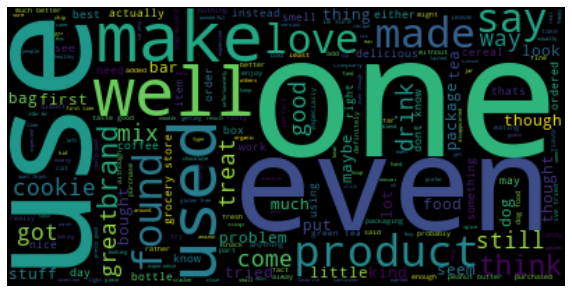

In [ ]:
#plot the wordcloud object
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_1, interpolation='bilInear')
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter
results_conteggiointero = Counter()
amazon["Text_stemming"].apply(results_conteggiointero.update)
#print(results)
results_conteggiointero = pd.DataFrame.from_dict(results_conteggiointero, orient='index').reset_index()
results_conteggiointero = results_conteggiointero.rename(columns={"index": "Parola", 0 : "Conteggio"})
results_conteggiointero = results_conteggiointero.sort_values(by='Conteggio', ascending=False)
results_conteggiointero.head()

Parola  Conteggio
227     like      88411
245     tast      83860
13        br      81905
353   flavor      60828
308  product      59321

[Text(0, 0.5, 'Parola'),
 (0.0, 95000.0),
 Text(0.5, 0, 'Conteggio Parola'),
 Text(0.5, 1.0, 'Conteggio Parole Text Amazon Review')]

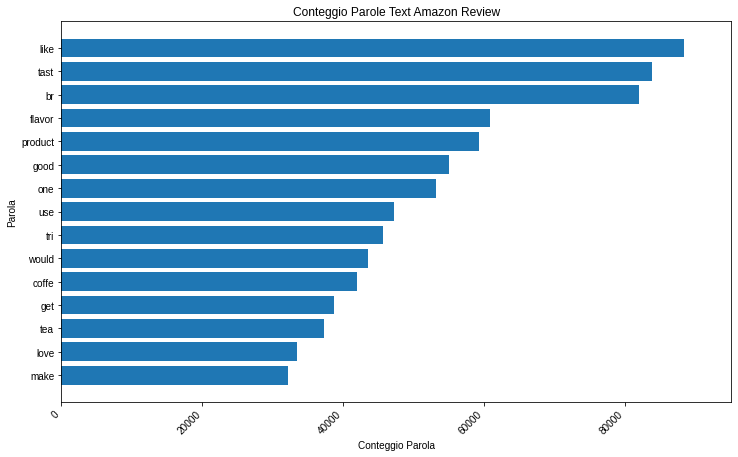

In [ ]:
conteggiowordcloud1valoritop15 = results_conteggiointero.head(15)
conteggiowordcloud1valoritop15 = conteggiowordcloud1valoritop15.sort_values("Conteggio", ascending= True)

fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(conteggiowordcloud1valoritop15['Parola'], conteggiowordcloud1valoritop15['Conteggio'])
labels = ax.get_xticklabels()
plt.style.use('seaborn')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 95000], xlabel='Conteggio Parola', ylabel='Parola',
       title='Conteggio Parole Text Amazon Review')

# TEXT REPRESENTATION AND CLASSIFICATION FOR STEMMED TEXT
We represent the text in two different ways: Bag of Words and TD-IDF. 
Cause the computational diffculty to perfomr the algorthms we decide to apply a dimensionl reduction of maximum 400 features.  

## BAG OF WORDS 

In [ ]:
amazon['Text_stemming'] = amazon['Text_stemming'].apply(str)
text = amazon['Text_stemming']

In [ ]:
vectorizer = CountVectorizer(max_features = 1000)
text_bagofwords_stemmed =  vectorizer.fit_transform(text)

In [ ]:
#SET UP DI 1000 FEATURE
print(text_bagofwords_stemmed.shape)
#print(text_bagofwords_stemmed)

(150000, 1000)


## TD -  IDF 

In [ ]:
vectorizer = TfidfVectorizer(max_features = 15000)
text_tdidf_stemmed = vectorizer.fit_transform(text)

In [ ]:
print(text_tdidf_stemmed.shape)
#print(text_tdidf_stemmed)

(150000, 15000)


# CLUSTERING - KMEANS - STEMMING

In [ ]:
amazon['Text_stemming_str'] = amazon['Text_stemming'].apply(str)
text_stem_str = amazon['Text_stemming_str']

In [ ]:
vectorizer_bow_stem = CountVectorizer(max_features = 15000)
X_bow_stem =  vectorizer_bow_stem.fit_transform(text_stem_str)

In [ ]:
vectorizer_tfid_stem = TfidfVectorizer(stop_words={'english'})
X_tfid_stem = vectorizer_tfid_stem.fit_transform(text_stem_str)

## KMEANS - BAG OF WORDS - STEMMING

In [ ]:
#Imposto il modello Kmeans per la suddivisione in clusters
k=5
model_bow_stem = KMeans(n_clusters=k, init='k-means++',max_iter=100,n_init=1)
model_bow_stem.fit(X_bow_stem)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels_bow_stem = model_bow_stem.labels_
clusters_bow_stem = pd.DataFrame(list(zip(text_stem_str,labels_bow_stem)),columns=['Text_stem_str','Cluster_bow_stem'])
print(clusters_bow_stem.sort_values(by=['Cluster_bow_stem']))

                                           Text_stem_str  Cluster_bow_stem
58148  ['drink', 'tea', 'frequent', 'obsess', 'minimu...                 0
66681  ['longtim', 'celesti', 'season', 'drinker', 'y...                 0
10818  ['buy', 'tea', 'teabag', 'form', 'small', 'tin...                 0
91471  ['honest', 'look', 'flavor', 'oolong', 'tea', ...                 0
75642  ['love', 'pomegran', 'love', 'berri', 'love', ...                 0
...                                                  ...               ...
72446  ['dont', 'like', 'strong', 'coffe', 'wasnt', '...                 4
72445  ['good', 'larg', 'pig', 'ear', '25', 'count', ...                 4
72444  ['fast', 'deliveri', 'receiv', 'one', '3', 'lb...                 4
19904  ['possibl', 'worst', 'sauc', 'ive', 'ever', 't...                 4
74999  ['dont', 'get', 'wrong', 'theyr', 'pretti', 'g...                 4

[150000 rows x 2 columns]


In [ ]:
amazon1 = amazon[['Score','Text_stemming']]
amazon1.head(2)  

Score                                      Text_stemming
212969      1  ['note', 'review', 'specif', 'cat', 'food', 's...
9648        1  ['well', 'bought', 'food', 'trip', 'parti', 'w...

In [ ]:
amazon1['Text_stemming']=amazon1['Text_stemming'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
clusters_bow_stem_daunire =clusters_bow_stem.rename(columns={'Text_stem_str':'Text_stemming','Cluster_bow_stem':'Cluster'})
clusters_bow_stem_daunire.head(2)

Text_stemming  Cluster
0  ['note', 'review', 'specif', 'cat', 'food', 's...        2
1  ['well', 'bought', 'food', 'trip', 'parti', 'w...        1

In [ ]:
unione_bow_stemdaunire = pd.merge(amazon1,clusters_bow_stem_daunire, on="Text_stemming")
unione_bow_stemdaunire.head()

Score                                      Text_stemming  Cluster
0      1  ['note', 'review', 'specif', 'cat', 'food', 's...        2
1      1  ['note', 'review', 'specif', 'cat', 'food', 's...        2
2      1  ['note', 'review', 'specif', 'cat', 'food', 's...        2
3      1  ['note', 'review', 'specif', 'cat', 'food', 's...        2
4      1  ['well', 'bought', 'food', 'trip', 'parti', 'w...        1

In [ ]:
finale_bow_stem = unione_bow_stemdaunire[['Score','Cluster']]
Score_bow_stem = finale_bow_stem ['Score']
Cluster_bow_stem = finale_bow_stem['Cluster']
finale_bow_stem.head()

Score  Cluster
0      1        2
1      1        2
2      1        2
3      1        2
4      1        1

In [ ]:
df_confusion_bow_stem = pd.crosstab(Cluster_bow_stem, Score_bow_stem)
df_confusion_bow_stem

Score        1      2      3      4      5
Cluster                                   
0          980   1821   1682   1263    727
1         7748  14897  13042   9072   3845
2         1078   1453   1850   1196    448
3         1389   2662   2488   1782    783
4        43962  52884  41356  32874  27770

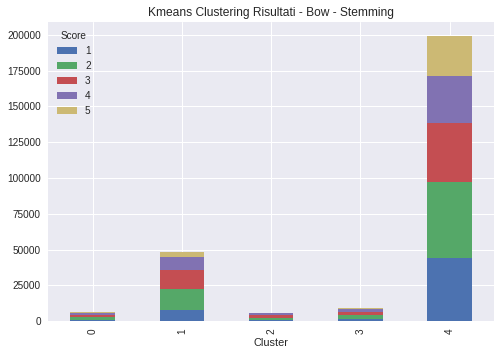

In [ ]:
df_confusion_bow_stem.plot.bar(stacked=True)
plt.title("Kmeans Clustering Risultati - Bow - Stemming")
plt.legend(title='Score')
plt.show()

In [ ]:
#Valutazione clustering Bag Of Words - Stemming
v_measure_score_bow_stem = v_measure_score(Score_bow_stem, Cluster_bow_stem)
print(v_measure_score(Score_bow_stem, Cluster_bow_stem))
normalized_mutual_info_score_bow_stem = normalized_mutual_info_score(Score_bow_stem, Cluster_bow_stem)
print(normalized_mutual_info_score(Score_bow_stem, Cluster_bow_stem))
fowlkes_mallows_score_bow_stem = fowlkes_mallows_score(Score_bow_stem, Cluster_bow_stem)
print(fowlkes_mallows_score(Score_bow_stem, Cluster_bow_stem))

0.006131428838360679
0.006131428838360679
0.34893092146343024


In [ ]:
#confusion_matrix_bow_stem = confusion_matrix(Cluster_bow_stem, Score_bow_stem)
#confusion_matrix_bow_stem
clusters_bow_stem.head()

Text_stem_str  Cluster_bow_stem
0  ['note', 'review', 'specif', 'cat', 'food', 's...                 2
1  ['well', 'bought', 'food', 'trip', 'parti', 'w...                 1
2  ['buyer', 'bewar', 'read', 'complet', 'get', '...                 4
3  ['took', 'one', 'bite', 'found', 'cracker', 'i...                 4
4  ['awar', 'imag', 'shown', 'true', 'product', '...                 4

In [ ]:
#WORD CLOUD PER CLUSTERS:

text_perwordcloud_c0 = clusters_bow_stem.loc[clusters_bow_stem["Cluster_bow_stem"] == 0, "Text_stem_str"].tolist() 
text_perwordcloud_c1 = clusters_bow_stem.loc[clusters_bow_stem["Cluster_bow_stem"] == 1, "Text_stem_str"].tolist() 
text_perwordcloud_c2 = clusters_bow_stem.loc[clusters_bow_stem["Cluster_bow_stem"] == 2, "Text_stem_str"].tolist() 
text_perwordcloud_c3 = clusters_bow_stem.loc[clusters_bow_stem["Cluster_bow_stem"] == 3, "Text_stem_str"].tolist() 
text_perwordcloud_c4 = clusters_bow_stem.loc[clusters_bow_stem["Cluster_bow_stem"] == 4, "Text_stem_str"].tolist() 

# join the list and lowercase all the words
text_perwordcloud_c0 = ' '.join(text_perwordcloud_c0).lower()
text_perwordcloud_c1 = ' '.join(text_perwordcloud_c1).lower()
text_perwordcloud_c2 = ' '.join(text_perwordcloud_c2).lower()
text_perwordcloud_c3 = ' '.join(text_perwordcloud_c3).lower()
text_perwordcloud_c4 = ' '.join(text_perwordcloud_c4).lower()

#create the wordcloud object
wordcloud_c0 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c0)
wordcloud_c1 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c1)
wordcloud_c2 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c2)
wordcloud_c3 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c3)
wordcloud_c4 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c4)

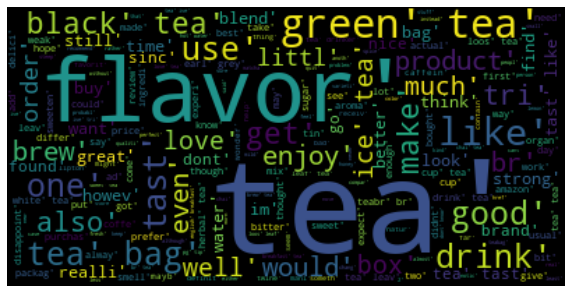

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c0, interpolation='bilInear')
plt.axis('off')
plt.show()

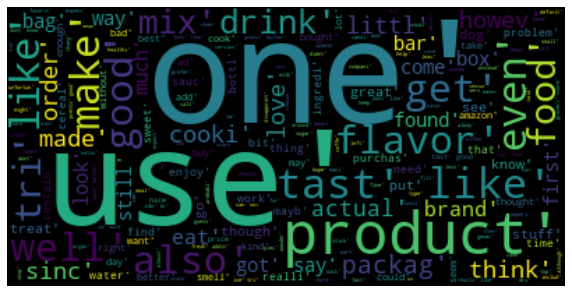

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c1, interpolation='bilInear')
plt.axis('off')
plt.show()

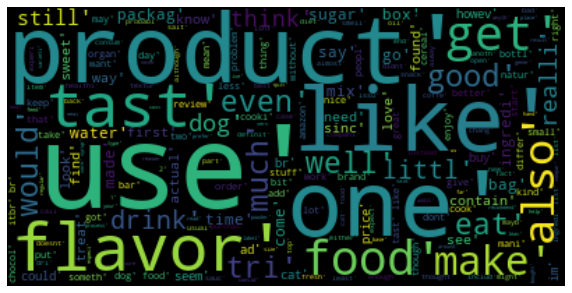

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c2, interpolation='bilInear')
plt.axis('off')
plt.show()

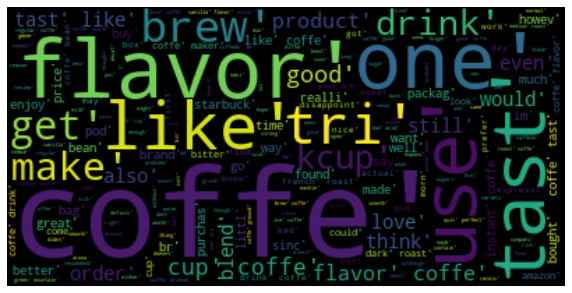

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c3, interpolation='bilInear')
plt.axis('off')
plt.show()

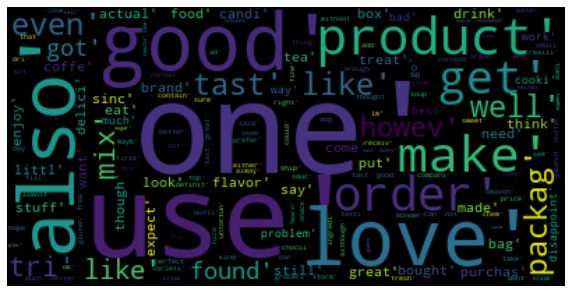

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c4, interpolation='bilInear')
plt.axis('off')
plt.show()

## KMEANS - TFID - STEMMING

In [ ]:
#Imposto il modello Kmeans per la suddivisione in clusters
k=5
model_tfid_stem = KMeans(n_clusters=k, init='k-means++',max_iter=100,n_init=1)
model_tfid_stem.fit(X_tfid_stem)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels_tfid_stem = model_tfid_stem.labels_
clusters_tfid_stem = pd.DataFrame(list(zip(text_stem_str,labels_tfid_stem)),columns=['Text_stem_str','Cluster_tfid_stem'])
print(clusters_tfid_stem.sort_values(by=['Cluster_tfid_stem']))

                                            Text_stem_str  Cluster_tfid_stem
74999   ['dont', 'get', 'wrong', 'theyr', 'pretti', 'g...                  0
109777  ['product', 'ok', 'never', 'purchas', 'hazelnu...                  0
51817   ['cracker', 'great', '12', 'box', 'purchas', '...                  0
51816   ['pleasur', 'drink', 'bright', 'green', 'smoot...                  0
109778  ['dont', 'much', 'care', 'sardin', 'gener', 'b...                  0
...                                                   ...                ...
122723  ['love', 'coffe', 'acid', 'minim', 'requir', '...                  4
106609  ['agre', 'review', 'found', 'coffe', 'smoother...                  4
106611  ['realli', 'enjoy', 'coff', 'right', 'balanc',...                  4
137670  ['love', 'coffe', 'got', 'best', 'deal', 'coff...                  4
79399   ['puroast', 'low', 'acid', 'coffe', 'say', 'al...                  4

[150000 rows x 2 columns]


In [ ]:
clusters_tfid_stem_daunire =clusters_tfid_stem.rename(columns={'Text_stem_str':'Text_stemming','Cluster_tfid_stem':'Cluster'})
clusters_tfid_stem_daunire.head(2)

Text_stemming  Cluster
0  ['note', 'review', 'specif', 'cat', 'food', 's...        1
1  ['well', 'bought', 'food', 'trip', 'parti', 'w...        3

In [ ]:
unione_tfid_stemdaunire = pd.merge(amazon1,clusters_tfid_stem_daunire, on="Text_stemming")
unione_tfid_stemdaunire.head()

Score                                      Text_stemming  Cluster
0      1  ['note', 'review', 'specif', 'cat', 'food', 's...        1
1      1  ['note', 'review', 'specif', 'cat', 'food', 's...        1
2      1  ['note', 'review', 'specif', 'cat', 'food', 's...        1
3      1  ['note', 'review', 'specif', 'cat', 'food', 's...        1
4      1  ['well', 'bought', 'food', 'trip', 'parti', 'w...        3

In [ ]:
finale_tfid_stem = unione_tfid_stemdaunire[['Score','Cluster']]
Score_tfid_stem = finale_tfid_stem ['Score']
Cluster_tfid_stem = finale_tfid_stem['Cluster']
finale_tfid_stem.head()

Score  Cluster
0      1        1
1      1        1
2      1        1
3      1        1
4      1        3

In [ ]:
df_confusion_tfid_stem = pd.crosstab(Cluster_tfid_stem, Score_tfid_stem)
df_confusion_tfid_stem

Score        1      2      3      4      5
Cluster                                   
0        32340  33454  25941  20626  18548
1         3985   4917   4161   3269   2600
2         2336   3831   3680   2888   2261
3        12850  25252  21390  14992   7656
4         3646   6263   5246   4412   2508

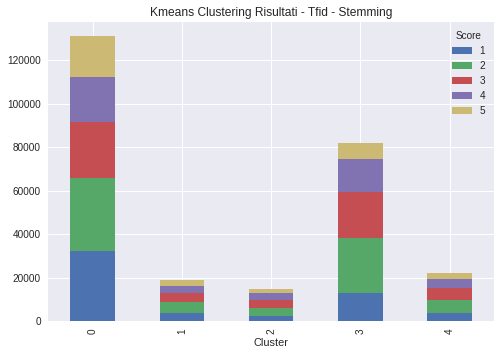

In [ ]:
df_confusion_tfid_stem.plot.bar(stacked=True)
plt.title("Kmeans Clustering Risultati - Tfid - Stemming")
plt.legend(title='Score')
plt.show()

In [ ]:
#Valutazione clustering Tfid - Stemming
v_measure_score_tfid_stem = v_measure_score(Score_tfid_stem, Cluster_tfid_stem)
print(v_measure_score(Score_tfid_stem, Cluster_tfid_stem))
normalized_mutual_info_score_tfid_stem = normalized_mutual_info_score(Score_tfid_stem, Cluster_tfid_stem)
print(normalized_mutual_info_score(Score_tfid_stem, Cluster_tfid_stem))
fowlkes_mallows_score_tfid_stem = fowlkes_mallows_score(Score_tfid_stem, Cluster_tfid_stem)
print(fowlkes_mallows_score(Score_tfid_stem, Cluster_tfid_stem))

0.007044751488438768
0.007044751488438768
0.2744854022989314


In [ ]:
clusters_tfid_stem.head()

Text_stem_str  Cluster_tfid_stem
0  ['note', 'review', 'specif', 'cat', 'food', 's...                  1
1  ['well', 'bought', 'food', 'trip', 'parti', 'w...                  3
2  ['buyer', 'bewar', 'read', 'complet', 'get', '...                  0
3  ['took', 'one', 'bite', 'found', 'cracker', 'i...                  3
4  ['awar', 'imag', 'shown', 'true', 'product', '...                  4

In [ ]:
#WORD CLOUD PER CLUSTERS:

text_perwordcloud_c0 = clusters_tfid_stem.loc[clusters_tfid_stem["Cluster_tfid_stem"] == 0, "Text_stem_str"].tolist() 
text_perwordcloud_c1 = clusters_tfid_stem.loc[clusters_tfid_stem["Cluster_tfid_stem"] == 1, "Text_stem_str"].tolist() 
text_perwordcloud_c2 = clusters_tfid_stem.loc[clusters_tfid_stem["Cluster_tfid_stem"] == 2, "Text_stem_str"].tolist() 
text_perwordcloud_c3 = clusters_tfid_stem.loc[clusters_tfid_stem["Cluster_tfid_stem"] == 3, "Text_stem_str"].tolist() 
text_perwordcloud_c4 = clusters_tfid_stem.loc[clusters_tfid_stem["Cluster_tfid_stem"] == 4, "Text_stem_str"].tolist() 

# join the list and lowercase all the words
text_perwordcloud_c0 = ' '.join(text_perwordcloud_c0).lower()
text_perwordcloud_c1 = ' '.join(text_perwordcloud_c1).lower()
text_perwordcloud_c2 = ' '.join(text_perwordcloud_c2).lower()
text_perwordcloud_c3 = ' '.join(text_perwordcloud_c3).lower()
text_perwordcloud_c4 = ' '.join(text_perwordcloud_c4).lower()

#create the wordcloud object
wordcloud_c0 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c0)
wordcloud_c1 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c1)
wordcloud_c2 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c2)
wordcloud_c3 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c3)
wordcloud_c4 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c4)

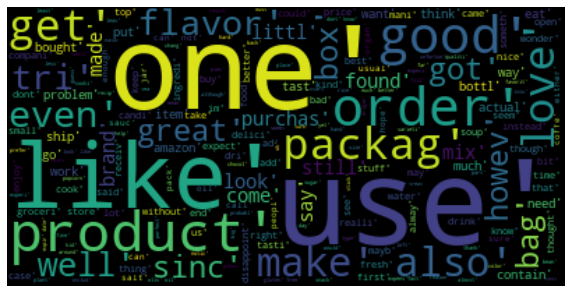

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c0, interpolation='bilInear')
plt.axis('off')
plt.show()

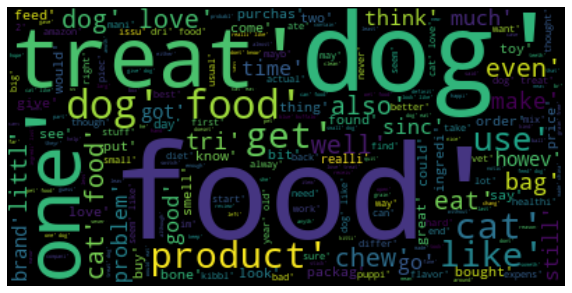

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c1, interpolation='bilInear')
plt.axis('off')
plt.show()

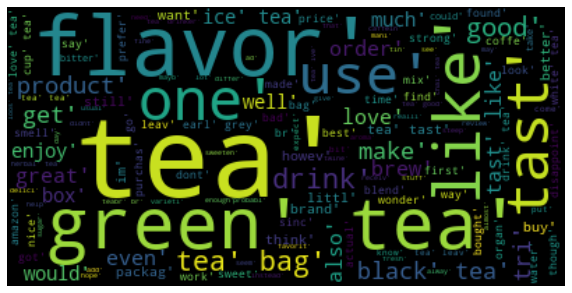

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c2, interpolation='bilInear')
plt.axis('off')
plt.show()

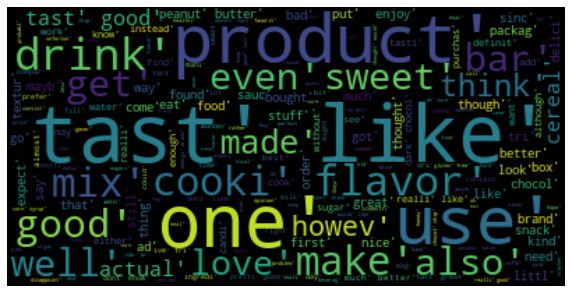

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c3, interpolation='bilInear')
plt.axis('off')
plt.show()

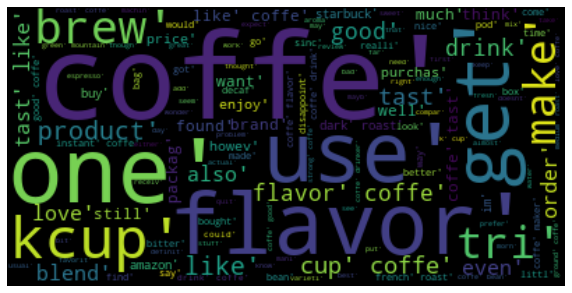

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c4, interpolation='bilInear')
plt.axis('off')
plt.show()

## Bagofwords - Machine learning - Stemmed

In [ ]:
x = text_bagofwords_stemmed
y = amazon['Score']

In [ ]:
#DIMENSIONALITY REDUCTON
#number of components 400
svd = TruncatedSVD (n_components=400, n_iter=100)
x = svd.fit_transform (x)
print(sum(svd.explained_variance_ratio_ ))

In [ ]:
#ADABOOST 
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_adaboost_bow_stemmed = accuracy_score(Y_test, y_pred)
accuracy_adaboost_bow_stemmed = round(accuracy_adaboost_bow_stemmed, 3)
print("Accuracy: ", accuracy_adaboost_bow_stemmed)
print(classification_report (Y_test, y_pred))

In [ ]:
#DECISIONTREECLASSIFIER
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = DecisionTreeClassifier(random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_decisiontree_bow_stemmed = accuracy_score(Y_test, y_pred)
accuracy_decisiontree_bow_stemmed = round(accuracy_decisiontree_bow_stemmed, 3)
print("Accuracy: ", accuracy_decisiontree_bow_stemmed)
print(classification_report (Y_test, y_pred))

In [ ]:
#RANDOM FOREST CLASSIFIER 
from sklearn.ensemble import RandomForestClassifier 
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_randomforest_bow_stemmed = accuracy_score(Y_test, y_pred)
accuracy_randomforest_bow_stemmed = round(accuracy_randomforest_bow_stemmed, 3)
print("Accuracy: ", accuracy_randomforest_bow_stemmed)
print(classification_report (Y_test, y_pred))

In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class='ovr').fit(X_train, Y_train)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
prediction = logisticRegr.predict(X_test)
accuracy_logreg_bow_stemmed = accuracy_score(Y_test, prediction)
accuracy_logreg_bow_stemmed = round(accuracy_logreg_bow_stemmed, 3)
print("Accuracy: ", accuracy_logreg_bow_stemmed)
print(classification_report(Y_test, prediction)) 

In [ ]:
#KNN 
#computational time = 15:51 / >21
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1).fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy_knn_bow_stemmed = accuracy_score(Y_test, prediction)
accuracy_knn_bow_stemmed = round(accuracy_knn_bow_stemmed, 3)
print("Accuracy: ", accuracy_knn_bow_stemmed)
print(classification_report(Y_test, prediction))

In [ ]:
#GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = GaussianNB().fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy_naive_bow_stemmed = accuracy_score(Y_test, prediction)
accuracy_naive_bow_stemmed = round(accuracy_naive_bow_stemmed, 3)
print("Accuracy: ", accuracy_naive_bow_stemmed)
print(classification_report(Y_test, prediction))

In [ ]:
#Confronto Accuracy dei vari modelli appena illustrati:
#Make a random dataset:
valori_accuracy_bow_stemmed = [accuracy_adaboost_bow_stemmed, accuracy_decisiontree_bow_stemmed, accuracy_randomforest_bow_stemmed, accuracy_logreg_bow_stemmed, accuracy_knn_bow_stemmed, accuracy_naive_bow_stemmed]
bars_accuracy_bow_stemmed = ('AdaBoost', 'DecisionTree', 'RandomForest', 'LogisticRegression', "Knn", "Gaussian Naive Bayes")
y_pos_accuracy_bow_stemmed = np.arange(len(bars_accuracy_bow_stemmed))
#Create bars
plt.bar(y_pos_accuracy_bow_stemmed, valori_accuracy_bow_stemmed)
#Create names on the x-axis
plt.xticks(y_pos_accuracy_bow_stemmed, bars_accuracy_bow_stemmed)
#Show graphic
plt.title("Confronto Accuracy Modelli Supervisionati")
plt.rcParams["figure.figsize"] = (10,10)
plt.show

## TD-IDF - Machine learning - stem

In [ ]:
x1 = text_tdidf_stemmed
y1 = amazon['Score']

In [ ]:
#SET UP OF 400
svd = TruncatedSVD (n_components=400, n_iter=100)
x1 = svd.fit_transform (x1)
print(sum(svd.explained_variance_ratio_ ))

In [ ]:
#ADABOOST 
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y,test_size = 0.30, random_state = 42)
model = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_adaboost_tfid_stemmed = accuracy_score(Y_test, y_pred)
accuracy_adaboost_tfid_stemmed = round(accuracy_adaboost_tfid_stemmed, 3)
print("Accuracy: ", accuracy_adaboost_tfid_stemmed)
print(classification_report (Y_test, y_pred))

In [ ]:
#DECISIONTREECLASSIFIER
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = DecisionTreeClassifier(random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_decisiontree_tfid_stemmed = accuracy_score(Y_test, y_pred)
accuracy_decisiontree_tfid_stemmed = round(accuracy_decisiontree_tfid_stemmed, 3)
print("Accuracy: ", accuracy_decisiontree_tfid_stemmed)
print(classification_report (Y_test, y_pred))

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier 
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_randomforest_tfid_stemmed = accuracy_score(Y_test, y_pred)
accuracy_randomforest_tfid_stemmed = round(accuracy_randomforest_tfid_stemmed, 3)
print("Accuracy: ", accuracy_randomforest_tfid_stemmed)
print(classification_report (Y_test, y_pred))

In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class='ovr').fit(X_train, Y_train)
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y,test_size = 0.30, random_state = 42)
prediction = logisticRegr.predict(X_test)
accuracy_logreg_tfid_stemmed = accuracy_score(Y_test, prediction)
accuracy_logreg_tfid_stemmed = round(accuracy_logreg_tfid_stemmed, 3)
print("Accuracy: ", accuracy_logreg_tfid_stemmed)
print(classification_report(Y_test, prediction)) 

In [ ]:
#KNN 
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1).fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy_knn_tfid_stemmed = accuracy_score(Y_test, prediction)
accuracy_knn_tfid_stemmed = round(accuracy_knn_tfid_stemmed, 3)
print("Accuracy: ", accuracy_knn_tfid_stemmed)
print(classification_report(Y_test, prediction))

In [ ]:
#GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = GaussianNB().fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy_naive_tfid_stemmed = accuracy_score(Y_test, prediction)
accuracy_naive_tfid_stemmed = round(accuracy_naive_tfid_stemmed, 3)
print("Accuracy: ", accuracy_naive_tfid_stemmed)
print(classification_report(Y_test, prediction))

In [ ]:
#Confronto Accuracy dei vari modelli appena illustrati:
#Make a random dataset:
valori_accuracy_tfid_stemmed = [accuracy_adaboost_tfid_stemmed, accuracy_decisiontree_tfid_stemmed, accuracy_randomforest_tfid_stemmed, accuracy_logreg_tfid_stemmed, accuracy_knn_tfid_stemmed, accuracy_naive_tfid_stemmed]
bars_accuracy_tfid_stemmed = ('AdaBoost', 'DecisionTree', 'RandomForest', 'LogisticRegression', "Knn", "Gaussian Naive Bayes")
y_pos_accuracy_tfid_stemmed = np.arange(len(bars_accuracy_tfid_stemmed))
#Create bars
plt.bar(y_pos_accuracy_tfid_stemmed, valori_accuracy_tfid_stemmed)
#Create names on the x-axis
plt.xticks(y_pos_accuracy_tfid_stemmed, bars_accuracy_tfid_stemmed)
#Show graphic
plt.title("Confronto Accuracy Tfid Modelli Supervisionati")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

# TEXT REPRESENTATION AND CLASSIFICATION FOR LEMMATIZED TEXT
We represent the text in two different ways: Bag of Words and TD-IDF. 
Cause the computational diffculty to perfomr the algorthms we decide to apply a dimensionl reduction of maximum 400 features.  

## BAG OF WORDS - Lemmed

In [ ]:
amazon['Text_lemmatization'] = amazon['Text_lemmatization'].apply(str)
text = amazon['Text_lemmatization']

In [ ]:
vectorizer = CountVectorizer(max_features = 1000)
text_bagofwords_lemma =  vectorizer.fit_transform(text)

In [ ]:
#SET UP DI 1000 FEATURE
print(text_bagofwords_lemma.shape)
#print(text_bagofwords_lemma)

(150000, 1000)


TD -  IDF 

In [ ]:
vectorizer = TfidfVectorizer(max_features = 15000)
text_tdidf_lemma = vectorizer.fit_transform(text)

In [ ]:
print(text_tdidf_lemma.shape)
#print(text_tdidf_lemma)

(150000, 15000)


# Clustering - Kmeans - Lemmatization

In [ ]:
amazon['Text_lemmatization_str'] = amazon['Text_lemmatization'].apply(str)
text_lemma_str = amazon['Text_lemmatization_str']

In [ ]:
vectorizer_bow_lemma = CountVectorizer(max_features = 15000)
X_bow_lemma =  vectorizer_bow_lemma.fit_transform(text_lemma_str)

In [ ]:
vectorizer_tfid_lemma = TfidfVectorizer(stop_words={'english'})
X_tfid_lemma = vectorizer_tfid_lemma.fit_transform(text_lemma_str)

## Kmeans - Bow - Lemmatization

In [ ]:
#Imposto il modello Kmeans per la suddivisione in clusters
k=5
model_bow_lemma = KMeans(n_clusters=k, init='k-means++',max_iter=100,n_init=1)
model_bow_lemma.fit(X_bow_lemma)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels_bow_lemma = model_bow_lemma.labels_
clusters_bow_lemma = pd.DataFrame(list(zip(text_lemma_str,labels_bow_lemma)),columns=['Text_lemma_str','Cluster_bow_lemma'])
print(clusters_bow_lemma.sort_values(by=['Cluster_bow_lemma']))

                                           Text_lemma_str  Cluster_bow_lemma
73256   ['dont', 'labeled', 'swiss', 'stake', 'really'...                  0
92365   ['coffee', 'really', 'ok', 'know', 'expect', '...                  0
57292   ['unlike', 'many', 'reviewers', 'product', 'th...                  0
17076   ['saw', 'product', 'amazoncom', 'excited', 'be...                  0
17075   ['sure', 'completely', 'fault', 'realize', 'or...                  0
...                                                   ...                ...
113491  ['husband', 'drink', 'good', 'amount', 'crysta...                  4
147117  ['okay', 'matter', 'treat', 'bring', 'sausages...                  4
57809   ['bought', 'aerogarden', 'wife', 'back', 'may'...                  4
57787   ['chips', 'ahoy', 'chewy', 'gooey', 'chocofudg...                  4
0       ['note', 'review', 'specifically', 'cat', 'foo...                  4

[150000 rows x 2 columns]


In [ ]:
amazon1_lemma = amazon[['Score','Text_lemmatization_str']]
amazon1_lemma.head(2)

Score                             Text_lemmatization_str
212969      1  ['note', 'review', 'specifically', 'cat', 'foo...
9648        1  ['well', 'bought', 'food', 'tripping', 'party'...

In [ ]:
clusters_bow_lemma_daunire =clusters_bow_lemma.rename(columns={'Text_lemma_str':'Text_lemmatization_str','Cluster_bow_lemma':'Cluster'})
clusters_bow_lemma_daunire.head(2)

Text_lemmatization_str  Cluster
0  ['note', 'review', 'specifically', 'cat', 'foo...        4
1  ['well', 'bought', 'food', 'tripping', 'party'...        0

In [ ]:
unione_bow_lemmadaunire = pd.merge(amazon1_lemma,clusters_bow_lemma_daunire, on="Text_lemmatization_str")
unione_bow_lemmadaunire.head()

Score                             Text_lemmatization_str  Cluster
0      1  ['note', 'review', 'specifically', 'cat', 'foo...        4
1      1  ['note', 'review', 'specifically', 'cat', 'foo...        4
2      1  ['note', 'review', 'specifically', 'cat', 'foo...        4
3      1  ['note', 'review', 'specifically', 'cat', 'foo...        4
4      1  ['well', 'bought', 'food', 'tripping', 'party'...        0

In [ ]:
finale_bow_lemma = unione_bow_lemmadaunire[['Score','Cluster']]
Score_bow_lemma = finale_bow_lemma['Score']
Cluster_bow_lemma = finale_bow_lemma['Cluster']
finale_bow_lemma.head()

Score  Cluster
0      1        4
1      1        4
2      1        4
3      1        4
4      1        0

In [ ]:
df_confusion_bow_lemma = pd.crosstab(Cluster_bow_lemma, Score_bow_lemma)
df_confusion_bow_lemma

Score        1      2      3      4      5
Cluster                                   
0         6063  11850  11115   7566   3200
1         1048   1930   1865   1315    751
2         1477   2619   2391   1804    871
3        45737  56226  43677  34642  28423
4          832   1092   1364    858    326

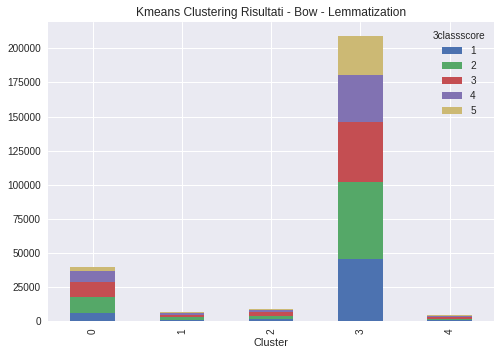

In [ ]:
df_confusion_bow_lemma.plot.bar(stacked=True)
plt.title("Kmeans Clustering Risultati - Bow - Lemmatization")
plt.legend(title='3classscore')
plt.show()

In [ ]:
#Valutazione clustering Bag Of Words - Lemmatization
v_measure_score_bow_lemma = v_measure_score(Score_bow_lemma, Cluster_bow_lemma)
print(v_measure_score(Score_bow_lemma, Cluster_bow_lemma))
normalized_mutual_info_score_bow_lemma = normalized_mutual_info_score(Score_bow_lemma, Cluster_bow_lemma)
print(normalized_mutual_info_score(Score_bow_lemma, Cluster_bow_lemma))
fowlkes_mallows_score_bow_lemma = fowlkes_mallows_score(Score_bow_lemma, Cluster_bow_lemma)
print(fowlkes_mallows_score(Score_bow_lemma, Cluster_bow_lemma))

0.005344164486191053
0.005344164486191053
0.3625517674329521


In [ ]:
#WORD CLOUD PER CLUSTERS:

text_perwordcloud_c0 = clusters_bow_lemma.loc[clusters_tfid_stem["Cluster_tfid_stem"] == 0, "Text_lemma_str"].tolist() 
text_perwordcloud_c1 = clusters_bow_lemma.loc[clusters_tfid_stem["Cluster_tfid_stem"] == 1, "Text_lemma_str"].tolist() 
text_perwordcloud_c2 = clusters_bow_lemma.loc[clusters_tfid_stem["Cluster_tfid_stem"] == 2, "Text_lemma_str"].tolist() 
text_perwordcloud_c3 = clusters_bow_lemma.loc[clusters_tfid_stem["Cluster_tfid_stem"] == 3, "Text_lemma_str"].tolist() 
text_perwordcloud_c4 = clusters_bow_lemma.loc[clusters_tfid_stem["Cluster_tfid_stem"] == 4, "Text_lemma_str"].tolist() 

# join the list and lowercase all the words
text_perwordcloud_c0 = ' '.join(text_perwordcloud_c0).lower()
text_perwordcloud_c1 = ' '.join(text_perwordcloud_c1).lower()
text_perwordcloud_c2 = ' '.join(text_perwordcloud_c2).lower()
text_perwordcloud_c3 = ' '.join(text_perwordcloud_c3).lower()
text_perwordcloud_c4 = ' '.join(text_perwordcloud_c4).lower()

#create the wordcloud object
wordcloud_c0 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c0)
wordcloud_c1 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c1)
wordcloud_c2 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c2)
wordcloud_c3 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c3)
wordcloud_c4 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c4)

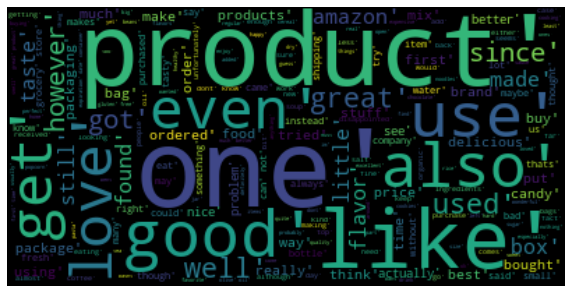

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c0, interpolation='bilInear')
plt.axis('off')
plt.show()

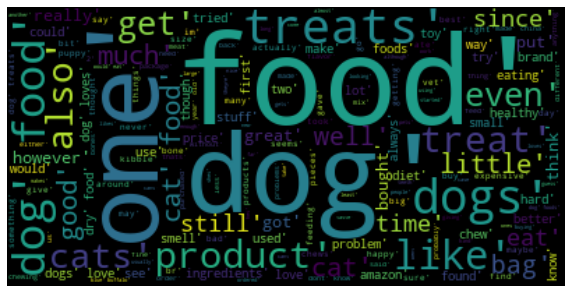

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c1, interpolation='bilInear')
plt.axis('off')
plt.show()

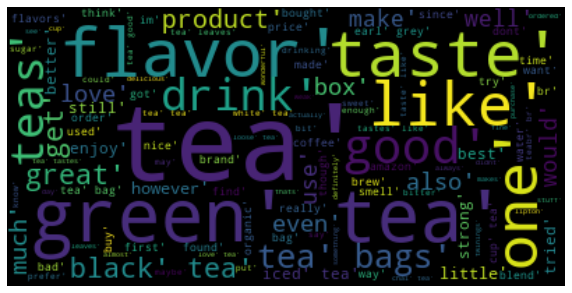

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c2, interpolation='bilInear')
plt.axis('off')
plt.show()

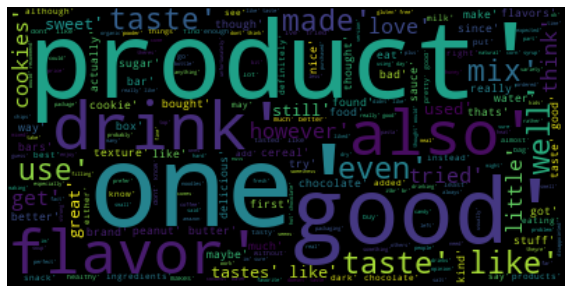

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c3, interpolation='bilInear')
plt.axis('off')
plt.show()

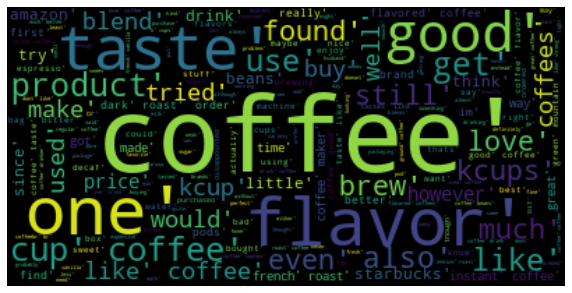

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c4, interpolation='bilInear')
plt.axis('off')
plt.show()

## Kmeans - tfid - lemmatization

In [ ]:
#Imposto il modello Kmeans per la suddivisione in clusters
k=5
model_tfid_lemma = KMeans(n_clusters=k, init='k-means++',max_iter=100,n_init=1)
model_tfid_lemma.fit(X_tfid_lemma)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels_tfid_lemma = model_tfid_lemma.labels_
clusters_tfid_lemma = pd.DataFrame(list(zip(text_lemma_str,labels_tfid_lemma)),columns=['Text_lemma_str','Cluster_tfid_lemma'])
print(clusters_tfid_lemma.sort_values(by=['Cluster_tfid_lemma']))

                                           Text_lemma_str  Cluster_tfid_lemma
0       ['note', 'review', 'specifically', 'cat', 'foo...                   0
117413  ['didnt', 'plan', 'writing', 'review', 'produc...                   0
27560   ['package', 'says', 'buffalo', 'venison', 'yet...                   0
117400  ['85', 'year', 'old', 'jack', 'russell', 'view...                   0
117398  ['went', 'searching', 'charcoal', 'dog', 'bisc...                   0
...                                                   ...                 ...
100916  ['kelloggs', 'original', 'allbran', 'cereal', ...                   4
39808   ['time', 'purchased', 'dora', 'explorer', 'non...                   4
39806   ['ive', 'tried', 'two', 'different', 'types', ...                   4
39825   ['ive', 'tried', 'several', 'annie', 'chun', '...                   4
149999  ['knew', 'nothing', 'kind', 'bars', 'saw', 'qv...                   4

[150000 rows x 2 columns]


In [ ]:
amazon1_lemma = amazon[['Score','Text_lemmatization_str']]
amazon1_lemma.head(2)

Score                             Text_lemmatization_str
212969      1  ['note', 'review', 'specifically', 'cat', 'foo...
9648        1  ['well', 'bought', 'food', 'tripping', 'party'...

In [ ]:
clusters_tfid_lemma_daunire =clusters_tfid_lemma.rename(columns={'Text_lemma_str':'Text_lemmatization_str','Cluster_tfid_lemma':'Cluster'})
clusters_tfid_lemma_daunire.head(2)

Text_lemmatization_str  Cluster
0  ['note', 'review', 'specifically', 'cat', 'foo...        0
1  ['well', 'bought', 'food', 'tripping', 'party'...        4

In [ ]:
unione_tfid_lemmadaunire = pd.merge(amazon1_lemma ,clusters_tfid_lemma_daunire, on="Text_lemmatization_str")
unione_tfid_lemmadaunire.head()

Score                             Text_lemmatization_str  Cluster
0      1  ['note', 'review', 'specifically', 'cat', 'foo...        0
1      1  ['note', 'review', 'specifically', 'cat', 'foo...        0
2      1  ['note', 'review', 'specifically', 'cat', 'foo...        0
3      1  ['note', 'review', 'specifically', 'cat', 'foo...        0
4      1  ['well', 'bought', 'food', 'tripping', 'party'...        4

In [ ]:
finale_tfid_lemma = unione_tfid_lemmadaunire[['Score','Cluster']]
Score_tfid_lemma = finale_tfid_lemma['Score']
Cluster_tfid_lemma = finale_tfid_lemma['Cluster']
finale_tfid_lemma.head()

Score  Cluster
0      1        0
1      1        0
2      1        0
3      1        0
4      1        4

In [ ]:
df_confusion_tfid_lemma = pd.crosstab(Cluster_tfid_lemma, Score_tfid_lemma)
df_confusion_tfid_lemma

Score        1      2      3      4      5
Cluster                                   
0         4054   4864   4094   3180   2535
1         3605   5940   5157   4271   2469
2        33719  35530  27152  21759  19714
3         2350   3739   3596   2807   2174
4        11429  23644  20413  14168   6679

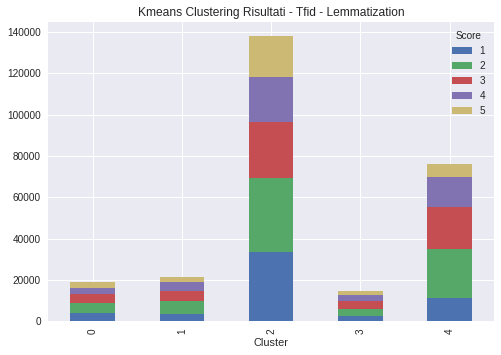

In [ ]:
df_confusion_tfid_lemma.plot.bar(stacked=True)
plt.title("Kmeans Clustering Risultati - Tfid - Lemmatization")
plt.legend(title='Score')
plt.show()

In [ ]:
#Valutazione clustering Tfid - Stemming
v_measure_score_tfid_lemma = v_measure_score(Score_tfid_lemma, Cluster_tfid_lemma)
print(v_measure_score(Score_tfid_lemma, Cluster_tfid_lemma))
normalized_mutual_info_score_tfid_lemma = normalized_mutual_info_score(Score_tfid_lemma, Cluster_tfid_lemma)
print(normalized_mutual_info_score(Score_tfid_lemma, Cluster_tfid_lemma))
fowlkes_mallows_score_tfid_lemma = fowlkes_mallows_score(Score_tfid_lemma, Cluster_tfid_lemma)
print(fowlkes_mallows_score(Score_tfid_lemma, Cluster_tfid_lemma))

0.007858049769951773
0.007858049769951771
0.27912148692680855


In [ ]:
#WORD CLOUD PER CLUSTERS:

text_perwordcloud_c0 = clusters_tfid_lemma.loc[clusters_tfid_lemma["Cluster_tfid_lemma"] == 0, "Text_lemma_str"].tolist() 
text_perwordcloud_c1 = clusters_tfid_lemma.loc[clusters_tfid_lemma['Cluster_tfid_lemma'] == 1, "Text_lemma_str"].tolist() 
text_perwordcloud_c2 = clusters_tfid_lemma.loc[clusters_tfid_lemma['Cluster_tfid_lemma'] == 2, "Text_lemma_str"].tolist()
text_perwordcloud_c3 = clusters_tfid_lemma.loc[clusters_tfid_lemma['Cluster_tfid_lemma'] == 3, "Text_lemma_str"].tolist() 
text_perwordcloud_c4 = clusters_tfid_lemma.loc[clusters_tfid_lemma['Cluster_tfid_lemma'] == 4, "Text_lemma_str"].tolist()  

# join the list and lowercase all the words
text_perwordcloud_c0 = ' '.join(text_perwordcloud_c0).lower()
text_perwordcloud_c1 = ' '.join(text_perwordcloud_c1).lower()
text_perwordcloud_c2 = ' '.join(text_perwordcloud_c2).lower()
text_perwordcloud_c3 = ' '.join(text_perwordcloud_c3).lower()
text_perwordcloud_c4 = ' '.join(text_perwordcloud_c4).lower()

#create the wordcloud object
wordcloud_c0 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c0)
wordcloud_c1 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c1)
wordcloud_c2 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c2)
wordcloud_c3 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c3)
wordcloud_c4 = WordCloud(stopwords = STOPWORDS, collocations=True).generate(text_perwordcloud_c4)

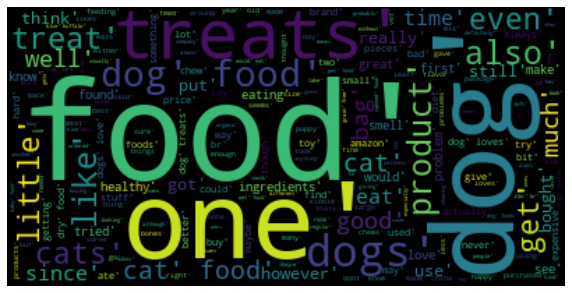

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c0, interpolation='bilInear')
plt.axis('off')
plt.show()

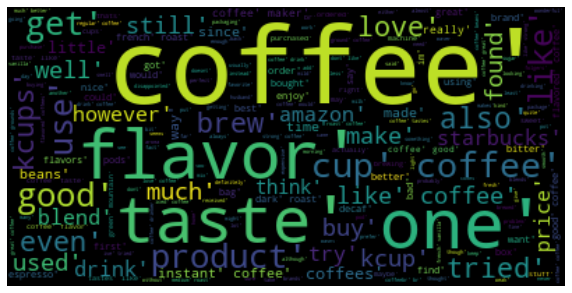

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c1, interpolation='bilInear')
plt.axis('off')
plt.show()

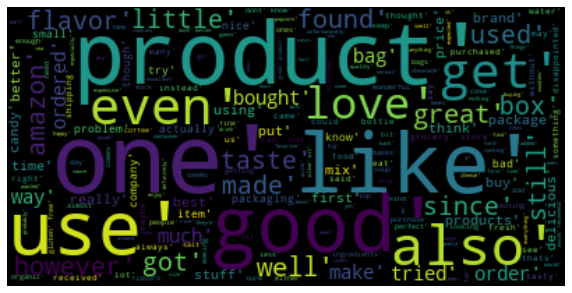

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c2, interpolation='bilInear')
plt.axis('off')
plt.show()

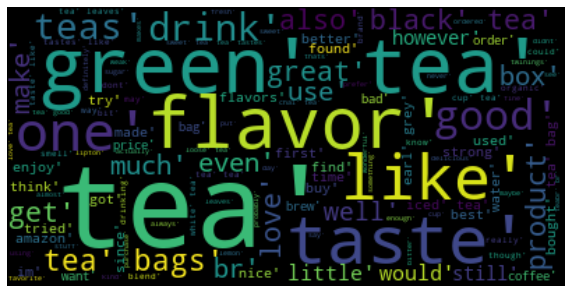

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c3, interpolation='bilInear')
plt.axis('off')
plt.show()

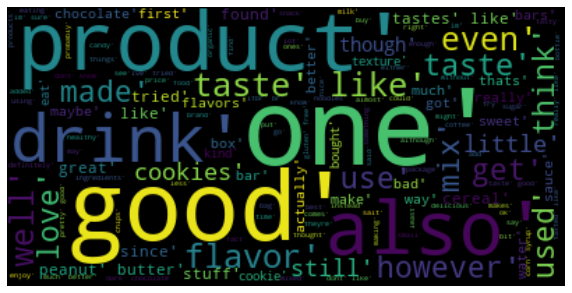

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_c4, interpolation='bilInear')
plt.axis('off')
plt.show()

Bagofwords

In [ ]:
x = text_bagofwords_lemma
y = amazon['Score']

In [ ]:
#DIMENSIONALITY REDUCTON
#number of components 400
svd = TruncatedSVD (n_components=400, n_iter=100)
x = svd.fit_transform (x)
print(sum(svd.explained_variance_ratio_ ))

0.8131801903901277


In [ ]:
#ADABOOST 
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_adaboost_bow_lemma = accuracy_score(Y_test, y_pred)
accuracy_adaboost_bow_lemma = round(accuracy_adaboost_bow_lemma, 3)
print("Accuracy: ", accuracy_adaboost_bow_lemma)
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.39      0.52      0.45      9000
           2       0.31      0.21      0.25      9000
           3       0.32      0.27      0.29      9000
           4       0.33      0.29      0.31      9000
           5       0.41      0.54      0.47      9000

    accuracy                           0.37     45000
   macro avg       0.36      0.37      0.35     45000
weighted avg       0.36      0.37      0.35     45000



In [ ]:
#DECISIONTREECLASSIFIER
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = DecisionTreeClassifier(random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_decisiontree_bow_lemma = accuracy_score(Y_test, y_pred)
accuracy_decisiontree_bow_lemma = round(accuracy_decisiontree_bow_lemma, 3)
print("Accuracy: ", accuracy_decisiontree_bow_lemma)
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.59      0.59      0.59      9000
           2       0.63      0.70      0.66      9000
           3       0.57      0.61      0.59      9000
           4       0.50      0.48      0.49      9000
           5       0.46      0.39      0.42      9000

    accuracy                           0.56     45000
   macro avg       0.55      0.56      0.55     45000
weighted avg       0.55      0.56      0.55     45000



In [ ]:
#RANDOM FOREST CLASSIFIER 
from sklearn.ensemble import RandomForestClassifier 
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_randomforest_bow_lemma = accuracy_score(Y_test, y_pred)
accuracy_randomforest_bow_lemma = round(accuracy_randomforest_bow_lemma, 3)
print("Accuracy: ", accuracy_randomforest_bow_lemma)
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.64      0.73      0.68      9000
           2       0.77      0.69      0.73      9000
           3       0.65      0.62      0.64      9000
           4       0.54      0.53      0.54      9000
           5       0.56      0.59      0.57      9000

    accuracy                           0.63     45000
   macro avg       0.63      0.63      0.63     45000
weighted avg       0.63      0.63      0.63     45000



In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class='ovr').fit(X_train, Y_train)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
prediction = logisticRegr.predict(X_test)
accuracy_logreg_bow_lemma = accuracy_score(Y_test, prediction)
accuracy_logreg_bow_lemma = round(accuracy_logreg_bow_lemma, 3)
print("Accuracy: ", accuracy_logreg_bow_lemma)
print(classification_report(Y_test, prediction)) 

              precision    recall  f1-score   support

           1       0.50      0.67      0.57      9000
           2       0.41      0.29      0.34      9000
           3       0.42      0.34      0.38      9000
           4       0.43      0.37      0.40      9000
           5       0.53      0.69      0.60      9000

    accuracy                           0.47     45000
   macro avg       0.46      0.47      0.46     45000
weighted avg       0.46      0.47      0.46     45000



In [ ]:
#KNN 
#computational time = 15:51
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1).fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy_knn_bow_lemma = accuracy_score(Y_test, prediction)
accuracy_knn_bow_lemma = round(accuracy_knn_bow_lemma, 3)
print("Accuracy: ", accuracy_knn_bow_lemma)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           1       0.37      0.60      0.46      9000
           2       0.40      0.46      0.42      9000
           3       0.42      0.32      0.37      9000
           4       0.37      0.28      0.32      9000
           5       0.45      0.31      0.37      9000

    accuracy                           0.39     45000
   macro avg       0.40      0.39      0.39     45000
weighted avg       0.40      0.39      0.39     45000



In [ ]:
#GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
X_train, X_test, Y_train, Y_test = train_test_split(x,y, stratify = y,test_size = 0.30, random_state = 42)
model = GaussianNB().fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy_naive_bow_lemma = accuracy_score(Y_test, prediction)
accuracy_naive_bow_lemma = round(accuracy_naive_bow_lemma, 3)
print("Accuracy: ", accuracy_naive_bow_lemma)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           1       0.35      0.14      0.20      9000
           2       0.32      0.06      0.10      9000
           3       0.25      0.29      0.27      9000
           4       0.30      0.07      0.11      9000
           5       0.24      0.75      0.37      9000

    accuracy                           0.26     45000
   macro avg       0.29      0.26      0.21     45000
weighted avg       0.29      0.26      0.21     45000



In [ ]:
#Confronto Accuracy dei vari modelli appena illustrati:
valori_accuracy_bow_lemma = [accuracy_adaboost_bow_lemma, accuracy_decisiontree_bow_lemma, accuracy_randomforest_bow_lemma, accuracy_logreg_bow_lemma, accuracy_knn_bow_lemma, accuracy_naive_bow_lemma]
bars_accuracy_bow_lemma = ('AdaBoost', 'DecisionTree', 'RandomForest', 'LogisticRegression', "Knn", "Gaussian Naive Bayes")
y_pos_accuracy_bow_lemma = np.arange(len(bars_accuracy_bow_lemma))
#Create bars
plt.bar(y_pos_accuracy_bow_lemma, valori_accuracy_bow_lemma)
#Create names on the x-axis
plt.xticks(y_pos_accuracy_bow_lemma, bars_accuracy_bow_lemma)
#Show graphic
plt.title("Confronto Accuracy Bow Lemma Modelli Supervisionati")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

TD-IDF

In [ ]:
x1 = text_tdidf_lemma
y1 = amazon['Score']

In [ ]:
#SET UP OF 400
svd = TruncatedSVD (n_components=400, n_iter=100)
x1 = svd.fit_transform (x1)
print(sum(svd.explained_variance_ratio_ ))

0.36269835164264447


In [ ]:
#ADABOOST 
from sklearn.ensemble import AdaBoostClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y,test_size = 0.30, random_state = 42)
model = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_adaboost_tfid_lemma = accuracy_score(Y_test, y_pred)
accuracy_adaboost_tfid_lemma = round(accuracy_adaboost_tfid_lemma, 3)
print("Accuracy: ", accuracy_adaboost_tfid_lemma)
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.44      0.57      0.50      9000
           2       0.34      0.26      0.29      9000
           3       0.33      0.26      0.29      9000
           4       0.37      0.33      0.35      9000
           5       0.45      0.57      0.50      9000

    accuracy                           0.40     45000
   macro avg       0.38      0.40      0.39     45000
weighted avg       0.38      0.40      0.39     45000



In [ ]:
#DECISIONTREECLASSIFIER
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = DecisionTreeClassifier(random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_decisiontree_tfid_lemma = accuracy_score(Y_test, y_pred)
accuracy_decisiontree_tfid_lemma = round(accuracy_decisiontree_tfid_lemma, 3)
print("Accuracy: ", accuracy_decisiontree_tfid_lemma)
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.63      0.64      0.63      9000
           2       0.63      0.71      0.67      9000
           3       0.58      0.61      0.60      9000
           4       0.51      0.49      0.50      9000
           5       0.50      0.43      0.46      9000

    accuracy                           0.58     45000
   macro avg       0.57      0.58      0.57     45000
weighted avg       0.57      0.58      0.57     45000



In [ ]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = GaussianNB().fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy_naive_tfid_lemma = accuracy_score(Y_test, prediction)
accuracy_naive_tfid_lemma = round(accuracy_naive_tfid_lemma, 3)
print("Accuracy: ", accuracy_naive_tfid_lemma)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           1       0.31      0.61      0.41      9000
           2       0.33      0.18      0.23      9000
           3       0.32      0.28      0.30      9000
           4       0.37      0.25      0.30      9000
           5       0.44      0.42      0.43      9000

    accuracy                           0.35     45000
   macro avg       0.35      0.35      0.33     45000
weighted avg       0.35      0.35      0.33     45000



In [ ]:
#KNN 
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1).fit(X_train, Y_train)
prediction = model.predict(X_test)
accuracy_knn_tfid_lemma = accuracy_score(Y_test, prediction)
accuracy_knn_tfid_lemma = round(accuracy_knn_tfid_lemma, 3)
print("Accuracy: ", accuracy_knn_tfid_lemma)
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           1       0.35      0.64      0.45      9000
           2       0.40      0.44      0.42      9000
           3       0.38      0.33      0.35      9000
           4       0.37      0.24      0.29      9000
           5       0.43      0.25      0.32      9000

    accuracy                           0.38     45000
   macro avg       0.39      0.38      0.37     45000
weighted avg       0.39      0.38      0.37     45000



In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier 
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y1,test_size = 0.30, random_state = 42)
model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42).fit(X_train,Y_train)
y_pred = model.predict(X_test) 
accuracy_randomforest_tfid_lemma = accuracy_score(Y_test, y_pred)
accuracy_randomforest_tfid_lemma = round(accuracy_randomforest_tfid_lemma, 3)
print("Accuracy: ", accuracy_randomforest_tfid_lemma)
print(classification_report (Y_test, y_pred))

              precision    recall  f1-score   support

           1       0.66      0.77      0.71      9000
           2       0.79      0.69      0.73      9000
           3       0.69      0.62      0.65      9000
           4       0.57      0.54      0.55      9000
           5       0.58      0.65      0.61      9000

    accuracy                           0.65     45000
   macro avg       0.66      0.65      0.65     45000
weighted avg       0.66      0.65      0.65     45000



In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class='ovr').fit(X_train, Y_train)
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1, stratify = y,test_size = 0.30, random_state = 42)
prediction = logisticRegr.predict(X_test)
accuracy_logreg_tfid_lemma = accuracy_score(Y_test, prediction)
accuracy_logreg_tfid_lemma = round(accuracy_logreg_tfid_lemma, 3)
print("Accuracy: ", accuracy_logreg_tfid_lemma)
print(classification_report(Y_test, prediction)) 

              precision    recall  f1-score   support

           1       0.54      0.68      0.60      9000
           2       0.43      0.33      0.37      9000
           3       0.43      0.36      0.39      9000
           4       0.45      0.40      0.42      9000
           5       0.56      0.69      0.62      9000

    accuracy                           0.49     45000
   macro avg       0.48      0.49      0.48     45000
weighted avg       0.48      0.49      0.48     45000



In [ ]:
#Confronto Accuracy dei vari modelli appena illustrati:
valori_accuracy_tfid_lemma = [accuracy_adaboost_tfid_lemma, accuracy_decisiontree_tfid_lemma, accuracy_randomforest_tfid_lemma, accuracy_logreg_tfid_lemma, accuracy_knn_tfid_lemma, accuracy_naive_tfid_lemma]
bars_accuracy_tfid_lemma = ('AdaBoost', 'DecisionTree', 'RandomForest', 'LogisticRegression', "Knn", "Gaussian Naive Bayes")
y_pos_accuracy_tfid_lemma = np.arange(len(bars_accuracy_tfid_lemma))
#Create bars
plt.bar(y_pos_accuracy_tfid_lemma, valori_accuracy_tfid_lemma)
#Create names on the x-axis
plt.xticks(y_pos_accuracy_tfid_lemma, bars_accuracy_tfid_lemma)
#Show graphic
plt.title("Confronto Accuracy Tfid Lemmatization Modelli Supervisionati")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

# CONFRONTI VARI

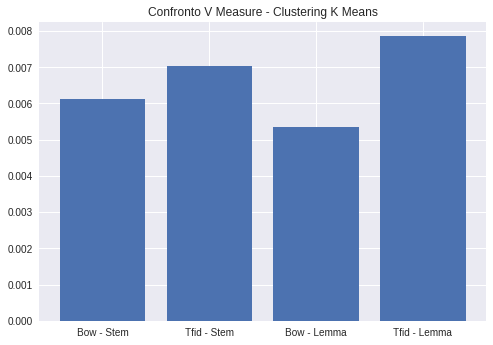

In [ ]:
#Make a random dataset:
valori_clustering_vmeasure = [v_measure_score_bow_stem, v_measure_score_tfid_stem, v_measure_score_bow_lemma, v_measure_score_tfid_lemma]
bars_clustering_vmeasure = ('Bow - Stem', 'Tfid - Stem', 'Bow - Lemma', 'Tfid - Lemma')
y_pos_clustering_vmeasure = np.arange(len(bars_clustering_vmeasure))
#Create bars
plt.bar(y_pos_clustering_vmeasure, valori_clustering_vmeasure)
#Create names on the x-axis
plt.xticks(y_pos_clustering_vmeasure, bars_clustering_vmeasure)
#Show graphic
plt.title("Confronto V Measure - Clustering K Means")
plt.show()

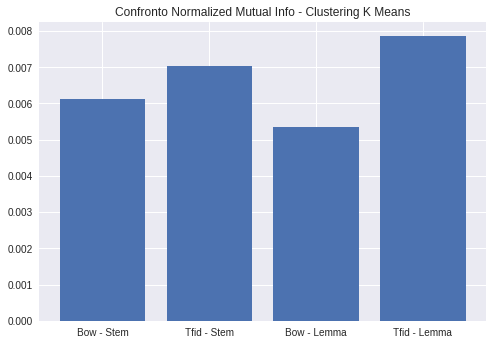

In [ ]:
#Make a random dataset:
valori_clustering_normamutualinfo = [normalized_mutual_info_score_bow_stem, normalized_mutual_info_score_tfid_stem, normalized_mutual_info_score_bow_lemma, normalized_mutual_info_score_tfid_lemma]
bars_clustering_normamutualinfo = ('Bow - Stem', 'Tfid - Stem', 'Bow - Lemma', 'Tfid - Lemma')
y_pos_clustering_normamutualinfo = np.arange(len(bars_clustering_normamutualinfo))
#Create bars
plt.bar(y_pos_clustering_normamutualinfo, valori_clustering_normamutualinfo)
#Create names on the x-axis
plt.xticks(y_pos_clustering_normamutualinfo, bars_clustering_normamutualinfo)
#Show graphic
plt.title("Confronto Normalized Mutual Info - Clustering K Means")
plt.show()

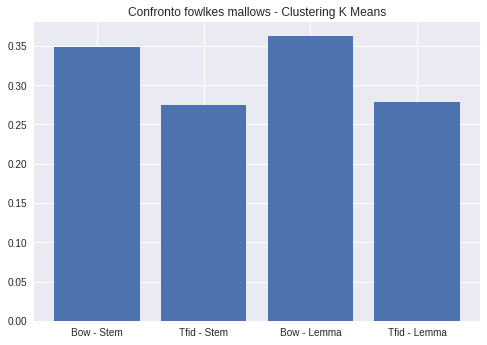

In [ ]:
#Make a random dataset:
valori_clustering_fowlkesmallows = [fowlkes_mallows_score_bow_stem, fowlkes_mallows_score_tfid_stem, fowlkes_mallows_score_bow_lemma, fowlkes_mallows_score_tfid_lemma]
bars_clustering_fowlkesmallows = ('Bow - Stem', 'Tfid - Stem', 'Bow - Lemma', 'Tfid - Lemma')
y_pos_clustering_fowlkesmallows = np.arange(len(bars_clustering_fowlkesmallows))
#Create bars
plt.bar(y_pos_clustering_fowlkesmallows, valori_clustering_fowlkesmallows)
#Create names on the x-axis
plt.xticks(y_pos_clustering_fowlkesmallows, bars_clustering_fowlkesmallows)
#Show graphic
plt.title("Confronto fowlkes mallows - Clustering K Means")
plt.show()

#SENTIMENT ANALYSIS 
- rimozione URLS
- rimozione HTML tags
- white space removal 
- lemmatization

In [ ]:
amazon_sent = pd.read_csv('/Users/matteo/Desktop/DATA SCIENCE/Text Mining and Search/ProgettoText/Reviewsprogettoamazon.csv')

amazon_sent = amazon_sent.drop_duplicates(subset = {"UserId", "ProfileName","Time","Text"})

amazon_sent = amazon_sent.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator', 'HelpfulnessDenominator','Time','Summary'], axis = 1)

#BALANCING
#we have selected 30000 rows with a single score value and we concatenate the five varaibles to obtain an unique dataframe
fraud1_df = amazon_sent.loc[amazon_sent['Score'] == 1].sample(n=30000,random_state=42, replace = True)
fraud2_df = amazon_sent.loc[amazon_sent['Score'] == 2].sample(n=30000,random_state=42, replace = True)
fraud3_df = amazon_sent.loc[amazon_sent['Score'] == 3].sample(n=30000,random_state=42, replace = True)
fraud4_df = amazon_sent.loc[amazon_sent['Score'] == 4].sample(n=30000,random_state=42, replace = True)
fraud5_df = amazon_sent.loc[amazon_sent['Score'] == 5].sample(n=30000,random_state=42, replace = True)

amazon_sent = pd.concat([fraud1_df,fraud2_df,fraud3_df,fraud4_df,fraud5_df])

In [ ]:
amazon_sent['Text'] = amazon_sent['Text'].str.strip() #REMOVE WHITE SPACE

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
    
amazon_sent["Text"] = amazon_sent["Text"].apply(lambda text: remove_urls(text)) #REMOVE URLS 

In [ ]:
#OPINION LEXICON
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
pos_list=set(opinion_lexicon.positive())
neg_list=set(opinion_lexicon.negative())

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def sentiment_opinion(sentence):
  total_sentiment = 0
  sentences = sentence.split(",")
  for s in sentences: 
    sentence_sentiment = 0
    sentence = [word.lower() for word in word_tokenize(s)] 
    

    for word in sentence:
      word = lemmatizer.lemmatize(word)

      if word in pos_list:
        sentence_sentiment += 1
      elif word in neg_list:
        sentence_sentiment -= 1

    if 'not' in sentence:
      sentence_sentiment = - sentence_sentiment
    total_sentiment += sentence_sentiment
  return total_sentiment

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#text sentiment
amazon_sent['Score_sentiment'] = amazon_sent['Text'].apply(sentiment_opinion)

In [ ]:
print(amazon_sent.loc[amazon_sent["Score"] > 3].count())
print(amazon_sent.loc[amazon_sent["Score"] < 3].count())
print(amazon_sent.loc[amazon_sent["Score"] == 3].count())

Score              60000
Text               60000
Score_sentiment    60000
dtype: int64
Score              60000
Text               60000
Score_sentiment    60000
dtype: int64
Score              30000
Text               30000
Score_sentiment    30000
dtype: int64


In [ ]:
amazon_sent.head()

In [ ]:
pd.set_option('display.max_rows', None)
amazon_sent['Score_sentiment'].value_counts()

 1     21777
 0     20742
 2     19321
-1     16716
 3     14762
-2     10989
 4     10302
-3      7002
 5      6616
 6      4375
-4      3969
 7      2783
-5      2186
 8      1807
-6      1190
 9      1155
 10      737
-7       725
 11      480
-8       456
 12      328
-9       252
 13      244
-10      160
 14      156
 15      115
-11      112
 16       81
 17       74
-12       61
 18       40
 19       38
 20       32
-13       30
 22       30
 21       16
-15       15
-14       15
-18       14
-16       12
 23       12
-17       11
 28        8
-19        8
 24        7
 25        5
 31        5
-20        4
 33        3
 48        3
-34        3
 26        3
 30        2
 27        2
-37        2
-23        2
 37        1
 39        1
-24        1
-22        1
 57        1
Name: Score_sentiment, dtype: int64

In [ ]:
print(amazon_sent.loc[amazon_sent['Score_sentiment'] > 0].count())
print(amazon_sent.loc[amazon_sent['Score_sentiment'] < 0].count())
print(amazon_sent.loc[amazon_sent['Score_sentiment'] == 0].count())

Score              85322
Text               85322
Score_sentiment    85322
dtype: int64
Score              43936
Text               43936
Score_sentiment    43936
dtype: int64
Score              20742
Text               20742
Score_sentiment    20742
dtype: int64


<BarContainer object of 3 artists>

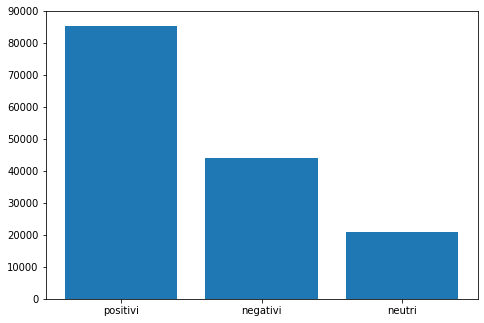

In [ ]:
#AFTER OPINION LEXICON 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['positivi', 'negativi', 'neutri']
val = [85322,43936,20742]
axes = plt.gca()
axes.set_ylim([0,90000])
ax.bar(langs,val)

<BarContainer object of 3 artists>

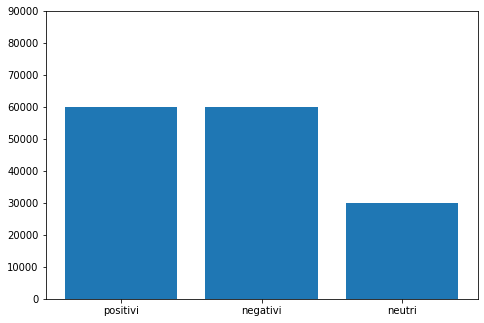

In [ ]:
#BEFORE OPINION LEXICON
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['positivi', 'negativi', 'neutri']
val = [60000,60000,30000]
axes = plt.gca()
axes.set_ylim([0,90000])
ax.bar(langs,val)

In [ ]:
#RESCALE -13;+22, THE OUTLIERS COULD BE MODIFY THE RESULTS 
amazon_sent['Score_sentiment'] = amazon_sent['Score_sentiment'].replace([57, 39, 37, 30, 27, 33, 48, 26, 31, 25, 24, 28, 23, 21 ],[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]) 
amazon_sent['Score_sentiment'] = amazon_sent['Score_sentiment'].replace([-22,-24,-37,-23,-34,-20,-19, -15,-14,-16],[-13,-13,-13,-13,-13,-13,-13, -13,-13,-13]) 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
amazon_sent['Score_sentiment'] = minmax_scale(amazon_sent['Score_sentiment'], feature_range=(1,5))
amazon_sent['Score_sentiment'] = amazon_sent['Score_sentiment'].round() 

In [ ]:
print(amazon_sent.loc[amazon_sent["Score_sentiment"] > 3].count())
print(amazon_sent.loc[amazon_sent["Score_sentiment"] < 3].count())
print(amazon_sent.loc[amazon_sent["Score_sentiment"] == 3].count())

Score              8169
Text               8169
Score_sentiment    8169
dtype: int64
Score              16231
Text               16231
Score_sentiment    16231
dtype: int64
Score              125600
Text               125600
Score_sentiment    125600
dtype: int64


In [ ]:
amazon_sent['Score_sentiment'].value_counts()

3.0    125600
2.0     16113
4.0      7960
5.0       209
1.0       118
Name: Score_sentiment, dtype: int64

In [ ]:
amazon_sent_matrix = amazon_sent.drop(["Text"],axis=1)

In [ ]:
amazon_sent_matrix['Score_sentiment'] = amazon_sent_matrix['Score_sentiment'].apply(int)
amazon_sent['Score_sentiment'] = amazon_sent['Score_sentiment'].apply(int)

In [ ]:
array = confusion_matrix(amazon_sent_matrix['Score'], amazon_sent_matrix['Score_sentiment'])
print(confusion_matrix(amazon_sent_matrix['Score'], amazon_sent_matrix['Score_sentiment']))

[[   40  4548 24982   420    10]
 [   20  3879 25213   869    19]
 [   20  3181 25126  1627    46]
 [   25  2548 24688  2666    73]
 [   13  1957 25591  2378    61]]


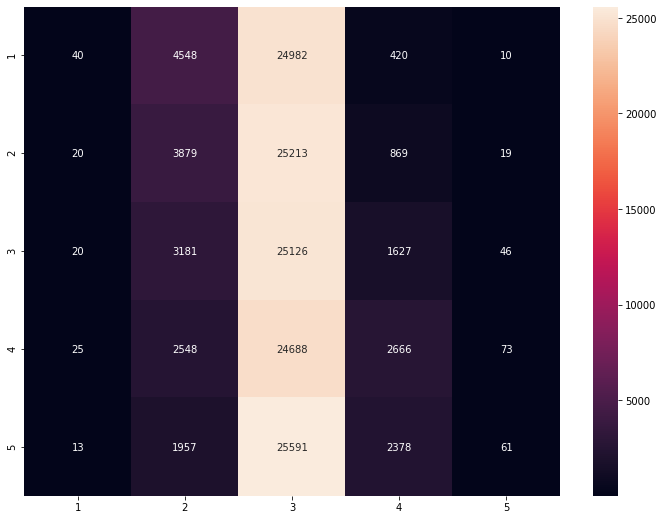

In [ ]:
df_cm = pd.DataFrame(array, index = [i for i in "12345"],columns = [i for i in "12345"])
plt.figure(figsize = (12,9))
sn.heatmap(df_cm, annot=True, fmt="d")
#the matrix shows a correct classification of 31772 over 150000 reviews, this approach has an accuracy of 21.18%

In [ ]:
amazon_sent.loc[amazon_sent['Score_sentiment'] == 1].head()

Score  ... Score_sentiment
526419      1  ...               1
407458      1  ...               1
526419      1  ...               1
362746      1  ...               1
526071      1  ...               1
328012      1  ...               1
152684      1  ...               1
240383      1  ...               1
252472      1  ...               1
55728       1  ...               1
13279       1  ...               1
31984       1  ...               1
80045       1  ...               1
104278      1  ...               1
31984       1  ...               1
372560      1  ...               1
31984       1  ...               1
257214      1  ...               1
514709      1  ...               1
552316      1  ...               1
339034      1  ...               1
89633       1  ...               1
89633       1  ...               1
189813      1  ...               1
308417      1  ...               1
411514      1  ...               1
89633       1  ...               1
514709      1  ...               1
137988      1  ...               1
104278      1  ...               1
252472      1  ...               1
526071      1  ...               1
40225       1  ...               1
104278      1  ...               1
240383      1  ...               1
411514      1  ...               1
31986       1  ...               1
411514      1  ...               1
31984       1  ...               1
308417      1  ...               1
343468      2  ...               1
343468      2  ...               1
220075      2  ...               1
274392      2  ...               1
70307       2  ...               1
232214      2  ...               1
115071      2  ...               1
220075      2  ...               1
232214      2  ...               1
528276      2  ...               1
540191      2  ...               1
220075      2  ...               1
540191      2  ...               1
58325       2  ...               1
540191      2  ...               1
343468      2  ...               1
274392      2  ...               1
274392      2  ...               1
115071      2  ...               1
89244       2  ...               1
479339      3  ...               1
284332      3  ...               1
299317      3  ...               1
230320      3  ...               1
118504      3  ...               1
111149      3  ...               1
479339      3  ...               1
348550      3  ...               1
352515      3  ...               1
297683      3  ...               1
207791      3  ...               1
207791      3  ...               1
7370        3  ...               1
92885       3  ...               1
352515      3  ...               1
89603       3  ...               1
441820      3  ...               1
299317      3  ...               1
163611      3  ...               1
230320      3  ...               1
347002      4  ...               1
77587       4  ...               1
409252      4  ...               1
73436       4  ...               1
174738      4  ...               1
484142      4  ...               1
77587       4  ...               1
48499       4  ...               1
23859       4  ...               1
400298      4  ...               1
385470      4  ...               1
23859       4  ...               1
384287      4  ...               1
317158      4  ...               1
300111      4  ...               1
177705      4  ...               1
152555      4  ...               1
201497      4  ...               1
484142      4  ...               1
347002      4  ...               1
174738      4  ...               1
491919      4  ...               1
138976      4  ...               1
268316      4  ...               1
422576      4  ...               1
391192      5  ...               1
426984      5  ...               1
40256       5  ...               1
234117      5  ...               1
125622      5  ...               1
222315      5  ...               1
18326       5  ...               1
148676      5  ...               1
209070      5  ...

In [ ]:
amazon_sent.loc[amazon_sent['Score_sentiment'] == 5].head()

Score  ... Score_sentiment
439700      1  ...               5
147930      1  ...               5
59673       1  ...               5
97937       1  ...               5
147930      1  ...               5
97937       1  ...               5
246318      1  ...               5
84222       1  ...               5
157692      1  ...               5
84222       1  ...               5
522678      2  ...               5
522678      2  ...               5
45134       2  ...               5
330828      2  ...               5
91528       2  ...               5
124525      2  ...               5
285911      2  ...               5
285911      2  ...               5
522678      2  ...               5
330828      2  ...               5
285911      2  ...               5
176514      2  ...               5
45134       2  ...               5
490676      2  ...               5
522678      2  ...               5
490676      2  ...               5
285911      2  ...               5
176514      2  ...               5
176514      2  ...               5
462659      3  ...               5
441776      3  ...               5
266555      3  ...               5
462659      3  ...               5
89459       3  ...               5
22541       3  ...               5
462659      3  ...               5
30093       3  ...               5
177392      3  ...               5
373857      3  ...               5
266555      3  ...               5
497047      3  ...               5
435820      3  ...               5
462659      3  ...               5
500768      3  ...               5
92059       3  ...               5
371497      3  ...               5
42663       3  ...               5
177392      3  ...               5
487636      3  ...               5
465187      3  ...               5
169702      3  ...               5
290807      3  ...               5
373857      3  ...               5
29551       3  ...               5
290807      3  ...               5
135873      3  ...               5
373857      3  ...               5
371497      3  ...               5
266555      3  ...               5
465187      3  ...               5
89459       3  ...               5
177392      3  ...               5
169702      3  ...               5
20502       3  ...               5
373857      3  ...               5
441776      3  ...               5
232154      3  ...               5
435820      3  ...               5
290807      3  ...               5
240309      3  ...               5
371497      3  ...               5
410418      3  ...               5
367322      3  ...               5
250963      3  ...               5
169702      3  ...               5
65620       4  ...               5
44202       4  ...               5
84077       4  ...               5
33400       4  ...               5
11519       4  ...               5
458794      4  ...               5
126729      4  ...               5
266049      4  ...               5
335575      4  ...               5
458794      4  ...               5
157088      4  ...               5
284309      4  ...               5
135561      4  ...               5
135561      4  ...               5
198185      4  ...               5
216853      4  ...               5
126729      4  ...               5
114209      4  ...               5
417135      4  ...               5
322452      4  ...               5
20419       4  ...               5
109088      4  ...               5
271304      4  ...               5
247956      4  ...               5
387958      4  ...               5
11519       4  ...               5
558104      4  ...               5
373442      4  ...               5
247956      4  ...               5
177748      4  ...               5
266065      4  ...               5
182597      4  ...               5
63161       4  ...               5
540399      4  ...               5
16625       4  ...               5
65620       4  ...               5
311388      4  ...               5
528829      4  ...               5
266065      4  ...